In [17]:
#Yuki's Code

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.stattools import coint

In [19]:
filename='data/utilities.csv'
df = pd.read_csv(filename, index_col = 0)
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,NVO,Novo Nordisk A/S,187.05,0.44,+0.24%,1.596M,3.44M,836.843B,44.12,NaN
1,LLY,Eli Lilly and Company,574.96,3.68,+0.64%,2.184M,2.898M,545.807B,79.86,NaN
2,UNH,UnitedHealth Group Incorporated,480.66,-5.40,-1.11%,3.164M,3.266M,445.238B,21.50,NaN
3,NONOF,Novo Nordisk A/S,92.77,-0.23,-0.25%,3731,49028,415.139B,21.88,NaN
4,JNJ,Johnson & Johnson,162.20,-0.27,-0.17%,5.55M,22.789M,390.579B,32.97,NaN


In [20]:
df.shape

(100, 10)

In [21]:
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6  # Convert to millions
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3  # Convert to thousands
    else:
        return float(value)  # No conversion needed

# Apply the conversion function to the 'Volume' column
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].apply(convert_volume)

In [22]:
 # Define a volume cap
volume_cap = 1000000

df['Avg Vol (3 month)'] = pd.to_numeric(df['Avg Vol (3 month)'], errors='coerce')
df['Price (Intraday)'] = pd.to_numeric(df['Price (Intraday)'], errors='coerce')

df = df[['Symbol','Avg Vol (3 month)','Price (Intraday)']].sort_values(by='Avg Vol (3 month)', ascending=False)

high_volume = df["Avg Vol (3 month)"]>volume_cap
df_h = df[high_volume]
tickers = df_h.Symbol.tolist()
tickers

['PFE',
 'JNJ',
 'BMY',
 'CVS',
 'MRK',
 'BSX',
 'GILD',
 'AZN',
 'ABBV',
 'MDT',
 'ABT',
 'HLN',
 'MRNA',
 'DXCM',
 'GSK',
 'NVO',
 'CNC',
 'UNH',
 'EW',
 'GEHC',
 'LLY',
 'DHR',
 'AMGN',
 'HZNP',
 'CAH',
 'TAK',
 'A',
 'ZTS',
 'ISRG',
 'COR',
 'ILMN',
 'RHHBY',
 'TMO',
 'ZBH',
 'NVS',
 'CI',
 'HUM',
 'HCA',
 'SYK',
 'BDX',
 'SNY',
 'ELV',
 'SGEN',
 'VRTX',
 'BIIB']

In [23]:
#period = '1y' #valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#interval = '1d' #valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#df = yf.download(tickers, period=period, interval=interval)["Close"]


# Enable to use start & end dates:
start = datetime.date.today() - datetime.timedelta(days=430)
end = datetime.date.today() - datetime.timedelta(days=60)

df = yf.download(tickers, start, end)["Close"]

df.info()

[*********************100%%**********************]  45 of 45 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2022-07-18 to 2023-07-21
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       255 non-null    float64
 1   ABBV    255 non-null    float64
 2   ABT     255 non-null    float64
 3   AMGN    255 non-null    float64
 4   AZN     255 non-null    float64
 5   BDX     255 non-null    float64
 6   BIIB    255 non-null    float64
 7   BMY     255 non-null    float64
 8   BSX     255 non-null    float64
 9   CAH     255 non-null    float64
 10  CI      255 non-null    float64
 11  CNC     255 non-null    float64
 12  COR     255 non-null    float64
 13  CVS     255 non-null    float64
 14  DHR     255 non-null    float64
 15  DXCM    255 non-null    float64
 16  ELV     255 non-null    float64
 17  EW      255 non-null    float64
 18  GEHC    149 non-null    float64
 19  GILD    255 non-null   

In [24]:
df.head()

,A,ABBV,ABT,AMGN,AZN,BDX,BIIB,BMY,BSX,CAH,...,RHHBY,SGEN,SNY,SYK,TAK,TMO,UNH,VRTX,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-18,115.110001,149.570007,107.019997,243.839996,66.370003,234.309998,214.339996,73.739998,37.169998,54.740002,...,41.799999,168.470001,50.150002,189.270004,14.41,520.760010,519.369995,286.059998,103.480003,171.759995
2022-07-19,119.059998,149.740005,109.930000,247.320007,68.160004,238.460007,220.259995,73.139999,37.709999,55.680000,...,42.770000,172.830002,51.599998,197.300003,14.66,536.869995,533.450012,289.600006,107.239998,177.419998
2022-07-20,119.860001,147.690002,108.230003,246.630005,65.790001,237.190002,207.490005,72.820000,37.279999,55.689999,...,42.180000,172.619995,49.889999,198.050003,14.48,538.650024,519.469971,285.500000,108.000000,176.250000
2022-07-21,127.190002,147.750000,110.690002,245.779999,65.360001,241.080002,214.059998,73.040001,38.119999,56.130001,...,41.959999,173.160004,49.959999,200.240005,14.71,575.000000,522.460022,283.109985,108.449997,180.600006
2022-07-22,125.040001,148.470001,109.199997,245.949997,65.250000,242.130005,206.250000,72.949997,38.119999,56.990002,...,42.080002,171.619995,49.830002,199.419998,14.61,561.539978,521.409973,280.290009,107.000000,178.179993


In [25]:
df = df.dropna(axis=0, how='all') # check if necessary
df = df.dropna(axis=1) # check if necessary
new_tickers = df.columns.tolist()
print(f"we have {len(new_tickers)} tickers left")
file_name = "utilities_close_prices.pkl"
df.to_pickle(file_name)
df.info()

we have 43 tickers left
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2022-07-18 to 2023-07-21
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       255 non-null    float64
 1   ABBV    255 non-null    float64
 2   ABT     255 non-null    float64
 3   AMGN    255 non-null    float64
 4   AZN     255 non-null    float64
 5   BDX     255 non-null    float64
 6   BIIB    255 non-null    float64
 7   BMY     255 non-null    float64
 8   BSX     255 non-null    float64
 9   CAH     255 non-null    float64
 10  CI      255 non-null    float64
 11  CNC     255 non-null    float64
 12  COR     255 non-null    float64
 13  CVS     255 non-null    float64
 14  DHR     255 non-null    float64
 15  DXCM    255 non-null    float64
 16  ELV     255 non-null    float64
 17  EW      255 non-null    float64
 18  GILD    255 non-null    float64
 19  GSK     255 non-null    float64
 20  HCA     255 non-null    float64
 

In [26]:
# let's define a function to loop through the tickers and do a cointegration test for each combination
def cointegration_test(data, p_value=0.05):
    n = data.shape[1]
    # create matrix to be filled later
    stats = np.zeros((n, n))
    pvalues = np.ones((n, n))
    keys = data.keys() # get the info axis, returns columns if object is a dataframe
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            test_stat = result[0]
            pvalue = result[1]
            stats[i, j] = test_stat
            pvalues[i, j] = pvalue

            if pvalue < p_value: # pick only statistically significant ones
                pairs.append((keys[i], keys[j]))

    return stats, pvalues, pairs

[('A', 'BMY'), ('A', 'MRNA'), ('AMGN', 'ELV'), ('AZN', 'SNY'), ('BIIB', 'DHR'), ('BMY', 'ELV'), ('BSX', 'CVS'), ('BSX', 'DHR'), ('BSX', 'HCA'), ('BSX', 'NVO'), ('BSX', 'SNY'), ('BSX', 'ZBH'), ('CAH', 'COR'), ('CAH', 'DHR'), ('CAH', 'ISRG'), ('CAH', 'LLY'), ('CAH', 'NVS'), ('CAH', 'VRTX'), ('CNC', 'DHR'), ('COR', 'ISRG'), ('DHR', 'DXCM'), ('DHR', 'HCA'), ('DHR', 'LLY'), ('DHR', 'MRK'), ('DHR', 'NVO'), ('DHR', 'SYK'), ('DHR', 'UNH'), ('DHR', 'VRTX'), ('DHR', 'ZBH'), ('DXCM', 'MRK'), ('DXCM', 'SNY'), ('ELV', 'MRNA'), ('ELV', 'PFE'), ('ELV', 'SGEN'), ('ELV', 'ZTS'), ('EW', 'MDT'), ('GSK', 'HCA'), ('GSK', 'ISRG'), ('GSK', 'MRK'), ('GSK', 'NVO'), ('GSK', 'NVS'), ('GSK', 'SGEN'), ('GSK', 'SNY'), ('GSK', 'SYK'), ('GSK', 'TAK'), ('GSK', 'VRTX'), ('GSK', 'ZBH'), ('HCA', 'NVO'), ('HCA', 'NVS'), ('HCA', 'SNY'), ('HCA', 'SYK'), ('HCA', 'ZBH'), ('HUM', 'ILMN'), ('ILMN', 'ISRG'), ('ILMN', 'JNJ'), ('ILMN', 'LLY'), ('ILMN', 'MDT'), ('ILMN', 'MRK'), ('ILMN', 'MRNA'), ('ILMN', 'NVO'), ('ILMN', 'NVS'), ('

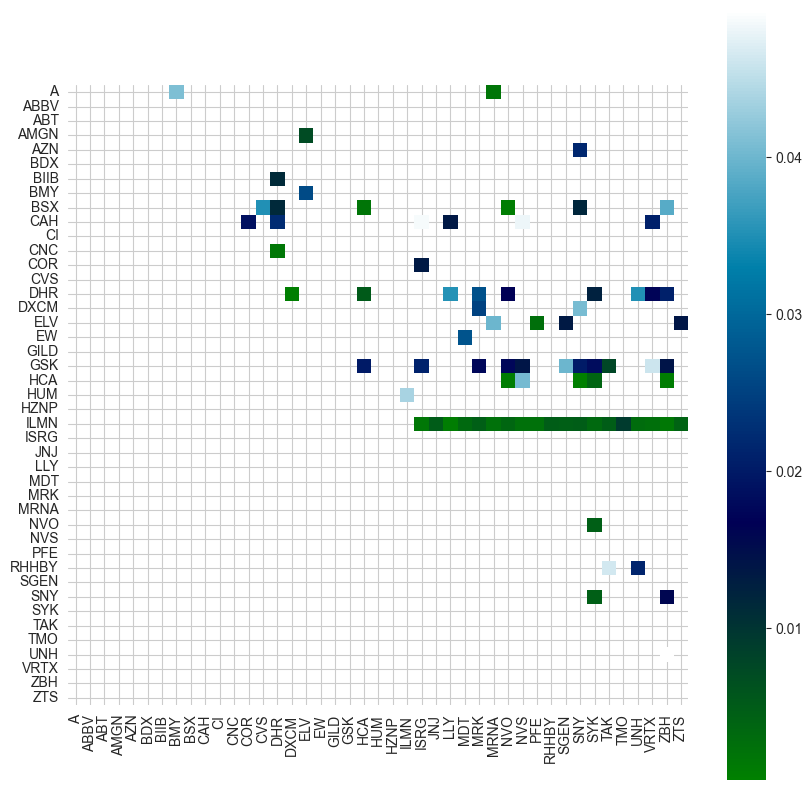

In [27]:
p_value = 0.05  # A p-value less than 0.05 is typically considered to be statistically significant

scores, pvalues, pairs = cointegration_test(df,p_value)

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    pvalues,
    xticklabels=new_tickers,
    yticklabels=new_tickers,
    cmap="ocean",
    mask=(pvalues >= 0.05),
    square=True
)
print(pairs)

,BMY,COR,CVS,DHR,DXCM,ELV,HCA,ILMN,ISRG,JNJ,LLY,MDT,MRK,MRNA,NVO,NVS,PFE,RHHBY,SGEN,SNY,SYK,TAK,TMO,UNH,VRTX,ZBH,ZTS
A,0.041,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AMGN,nan,nan,nan,nan,nan,0.007,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AZN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.022,nan,nan,nan,nan,nan,nan,nan
BIIB,nan,nan,nan,0.011,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BMY,nan,nan,nan,nan,nan,0.026,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BSX,nan,nan,0.035,0.012,nan,nan,0.002,nan,nan,nan,nan,nan,nan,nan,0.001,nan,nan,nan,nan,0.012,nan,nan,nan,nan,nan,0.038,nan
CAH,nan,0.019,nan,0.022,nan,nan,nan,nan,0.049,nan,0.014,nan,nan,nan,nan,0.048,nan,nan,nan,nan,nan,nan,nan,nan,0.021,nan,nan
CNC,nan,nan,nan,0.002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
COR,nan,nan,nan,nan,nan,nan,nan,nan,0.013,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DHR,nan,nan,nan,nan,0.001,nan,0.005,nan,nan,nan,0.035,nan,0.027,nan,0.017,nan,nan,nan,nan,nan,0.012,nan,nan,0.035,0.017,0.021,nan


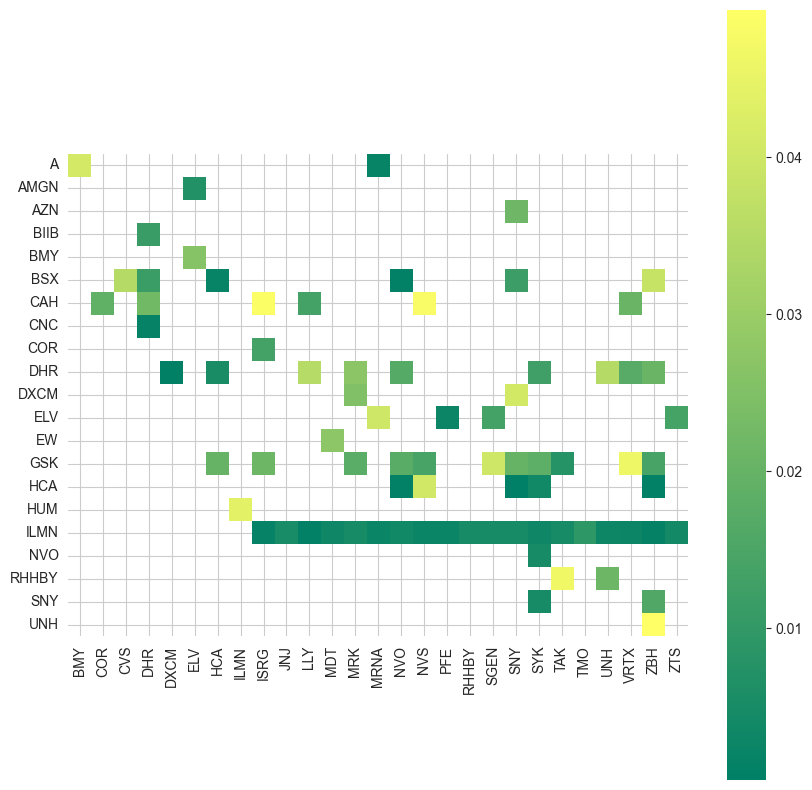

In [28]:
mask_matrix = (pvalues >= 0.05) # possible to increase the level of significance

mask_df = pd.DataFrame(mask_matrix, index= new_tickers, columns = new_tickers)
scores_df = pd.DataFrame(scores, index= new_tickers, columns = new_tickers)
pvalues_df = pd.DataFrame(pvalues, index= new_tickers, columns = new_tickers)

df_f = pvalues_df[~mask_df].dropna(how='all', axis=1)
df_f = df_f.dropna(how='all')

def gold_apply(x):
    color = {True: "background-color: #c78f2e", False: "color : white"}
    is_color = (x > 0).replace(color)
    return is_color


fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    df_f,
    xticklabels=df_f.columns,
    yticklabels=df_f.index,
    cmap="summer",
    square=True
)
df_f.style.format(precision=3) \
    .apply(gold_apply)

In [29]:
x_list = df_f.index.tolist()
y_list = df_f.columns.tolist()

new_pairs_list = [] # list of pairs as tuples (A,B)

for i in range(len(x_list)):
    for j in range(len(y_list)):
        if df_f.iloc[i,j]>0:
            new_pairs_list.append((x_list[i], y_list[j]))

new_pairs_list

[('A', 'BMY'),
 ('A', 'MRNA'),
 ('AMGN', 'ELV'),
 ('AZN', 'SNY'),
 ('BIIB', 'DHR'),
 ('BMY', 'ELV'),
 ('BSX', 'CVS'),
 ('BSX', 'DHR'),
 ('BSX', 'HCA'),
 ('BSX', 'NVO'),
 ('BSX', 'SNY'),
 ('BSX', 'ZBH'),
 ('CAH', 'COR'),
 ('CAH', 'DHR'),
 ('CAH', 'ISRG'),
 ('CAH', 'LLY'),
 ('CAH', 'NVS'),
 ('CAH', 'VRTX'),
 ('CNC', 'DHR'),
 ('COR', 'ISRG'),
 ('DHR', 'DXCM'),
 ('DHR', 'HCA'),
 ('DHR', 'LLY'),
 ('DHR', 'MRK'),
 ('DHR', 'NVO'),
 ('DHR', 'SYK'),
 ('DHR', 'UNH'),
 ('DHR', 'VRTX'),
 ('DHR', 'ZBH'),
 ('DXCM', 'MRK'),
 ('DXCM', 'SNY'),
 ('ELV', 'MRNA'),
 ('ELV', 'PFE'),
 ('ELV', 'SGEN'),
 ('ELV', 'ZTS'),
 ('EW', 'MDT'),
 ('GSK', 'HCA'),
 ('GSK', 'ISRG'),
 ('GSK', 'MRK'),
 ('GSK', 'NVO'),
 ('GSK', 'NVS'),
 ('GSK', 'SGEN'),
 ('GSK', 'SNY'),
 ('GSK', 'SYK'),
 ('GSK', 'TAK'),
 ('GSK', 'VRTX'),
 ('GSK', 'ZBH'),
 ('HCA', 'NVO'),
 ('HCA', 'NVS'),
 ('HCA', 'SNY'),
 ('HCA', 'SYK'),
 ('HCA', 'ZBH'),
 ('HUM', 'ILMN'),
 ('ILMN', 'ISRG'),
 ('ILMN', 'JNJ'),
 ('ILMN', 'LLY'),
 ('ILMN', 'MDT'),
 ('ILMN', 'MRK'

In [30]:
new_pairs_str =[] # list of pairs as string A-B

for column in df_f:
    toprint = df_f.index[df_f[column]>0].tolist()
    new_pairs_str.append([column + "-" + s for s in toprint])

new_pairs_str

[['BMY-A'],
 ['COR-CAH'],
 ['CVS-BSX'],
 ['DHR-BIIB', 'DHR-BSX', 'DHR-CAH', 'DHR-CNC'],
 ['DXCM-DHR'],
 ['ELV-AMGN', 'ELV-BMY'],
 ['HCA-BSX', 'HCA-DHR', 'HCA-GSK'],
 ['ILMN-HUM'],
 ['ISRG-CAH', 'ISRG-COR', 'ISRG-GSK', 'ISRG-ILMN'],
 ['JNJ-ILMN'],
 ['LLY-CAH', 'LLY-DHR', 'LLY-ILMN'],
 ['MDT-EW', 'MDT-ILMN'],
 ['MRK-DHR', 'MRK-DXCM', 'MRK-GSK', 'MRK-ILMN'],
 ['MRNA-A', 'MRNA-ELV', 'MRNA-ILMN'],
 ['NVO-BSX', 'NVO-DHR', 'NVO-GSK', 'NVO-HCA', 'NVO-ILMN'],
 ['NVS-CAH', 'NVS-GSK', 'NVS-HCA', 'NVS-ILMN'],
 ['PFE-ELV', 'PFE-ILMN'],
 ['RHHBY-ILMN'],
 ['SGEN-ELV', 'SGEN-GSK', 'SGEN-ILMN'],
 ['SNY-AZN', 'SNY-BSX', 'SNY-DXCM', 'SNY-GSK', 'SNY-HCA', 'SNY-ILMN'],
 ['SYK-DHR', 'SYK-GSK', 'SYK-HCA', 'SYK-ILMN', 'SYK-NVO', 'SYK-SNY'],
 ['TAK-GSK', 'TAK-ILMN', 'TAK-RHHBY'],
 ['TMO-ILMN'],
 ['UNH-DHR', 'UNH-ILMN', 'UNH-RHHBY'],
 ['VRTX-CAH', 'VRTX-DHR', 'VRTX-GSK', 'VRTX-ILMN'],
 ['ZBH-BSX',
  'ZBH-DHR',
  'ZBH-GSK',
  'ZBH-HCA',
  'ZBH-ILMN',
  'ZBH-SNY',
  'ZBH-UNH'],
 ['ZTS-ELV', 'ZTS-ILMN']]

In [31]:
new_pairs_dic= {} # list of pairs as dictionary {'A':['B','C']}

for column in df_f:
    new_pairs_dic[column] = df_f.index[df_f[column]>0].tolist()

new_pairs_dic

{'BMY': ['A'],
 'COR': ['CAH'],
 'CVS': ['BSX'],
 'DHR': ['BIIB', 'BSX', 'CAH', 'CNC'],
 'DXCM': ['DHR'],
 'ELV': ['AMGN', 'BMY'],
 'HCA': ['BSX', 'DHR', 'GSK'],
 'ILMN': ['HUM'],
 'ISRG': ['CAH', 'COR', 'GSK', 'ILMN'],
 'JNJ': ['ILMN'],
 'LLY': ['CAH', 'DHR', 'ILMN'],
 'MDT': ['EW', 'ILMN'],
 'MRK': ['DHR', 'DXCM', 'GSK', 'ILMN'],
 'MRNA': ['A', 'ELV', 'ILMN'],
 'NVO': ['BSX', 'DHR', 'GSK', 'HCA', 'ILMN'],
 'NVS': ['CAH', 'GSK', 'HCA', 'ILMN'],
 'PFE': ['ELV', 'ILMN'],
 'RHHBY': ['ILMN'],
 'SGEN': ['ELV', 'GSK', 'ILMN'],
 'SNY': ['AZN', 'BSX', 'DXCM', 'GSK', 'HCA', 'ILMN'],
 'SYK': ['DHR', 'GSK', 'HCA', 'ILMN', 'NVO', 'SNY'],
 'TAK': ['GSK', 'ILMN', 'RHHBY'],
 'TMO': ['ILMN'],
 'UNH': ['DHR', 'ILMN', 'RHHBY'],
 'VRTX': ['CAH', 'DHR', 'GSK', 'ILMN'],
 'ZBH': ['BSX', 'DHR', 'GSK', 'HCA', 'ILMN', 'SNY', 'UNH'],
 'ZTS': ['ELV', 'ILMN']}

In [32]:
df_f.to_pickle("pairs_to_download.pkl")